In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
def fbm(n,T,H,dim):
    dt = T/n
    fbm = np.zeros((dim,n))
    M = np.zeros((dim,n,n))

    rv = norm.rvs(size=(dim,n) , scale=np.sqrt(dt))
    
    for d in range(dim):
        for i in range(n):
            for j in range(n):
                M[d,i,j] = 0.5*(np.power(np.abs(i*dt),2*H)+np.power(np.abs(j*dt),2*H)+np.power(np.abs(i*dt-j*dt),2*H))
                
    w,v = np.linalg.eig(M)
    w = np.abs(w)
    L = np.zeros((dim,n,n))
    for d in range(dim):
        for i in range(n):
            L[d,i,i] = np.sqrt(w[d,i])
    
    for d in range(dim):
        
        fbm[d,:] = (v[d,:,:] * L[d,:,:] * np.linalg.inv(v[d,:,:])).dot(rv[d,:])

    return fbm

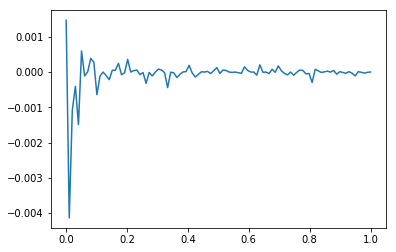

In [5]:
n = 100
T = 1
plt.plot(np.linspace(0,T,n), fbm(n,T,0.5,1)[0,:])


In [48]:
from fbm import FBM


f = FBM(n=1024, hurst=0.11, length=1, method='daviesharte')
# or
f = FBM(1024, 0.75)

# Generate a fBm realization
fbm_sample = f.fbm()

# Generate a fGn realization
fgn_sample = f.fgn()

# Get the times associated with the fBm
t_values = f.times()

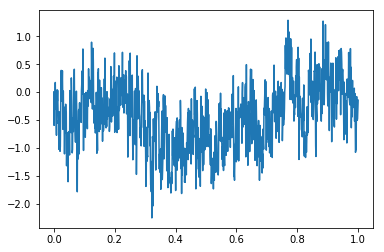

In [53]:
f = FBM(n=1024, hurst=0.1, length=1, method='daviesharte')
plt.plot(np.linspace(0,1,1025),  f.fbm())

In [8]:
from . import data_EM

ImportError: attempted relative import with no known parent package

In [36]:
def corr_brownian_motion(n, T, dim, rho):
    dt = T/n

    dW1 = norm.rvs(size=(dim,n+1) , scale=np.sqrt(dt))
    dW2 = rho * dW1 + np.sqrt(1 - np.power(rho ,2)) * norm.rvs(size=(dim,n+1) , scale=np.sqrt(dt))
        
    W1 = np.cumsum(dW1, axis=-1)
    W2 = np.cumsum(dW2, axis=-1)
 
    return W1,W2

def euler_maruyama(mu,sigma,T,x0,W):
    dim = W.shape[0]
    n = W.shape[1]-1
    Y = np.zeros((dim,n+1))
    dt = T/n
    sqrt_dt = np.sqrt(dt)
    for l in range(dim):
        Y[l,0] = x0
        for i in range(n):
            Y[l,i+1] = Y[l,i] + np.multiply(mu(Y[l,i],l,i),dt) + sigma(Y[l,i],l,i)*sqrt_dt*(W[l,i+1]-W[l,i])
    
    return Y

def rough_bergomi(H,nabla,lambdas,T,W,Z,S0):
    n = W.shape[1]-1
    dt = T/n
    W0 = 0
    def mu2(W_H,i,k):
        return 0.0
    
    def sigma2(W_H,i,k):
        return (T-k*dt)**(H-0.5)
    
    W_H = euler_maruyama(mu2,sigma2,T,W0,Z)
    
    def mu1(S,i,k):
        return 0.0
    
    def sigma1(S,i,k):
        return 0.0
    
    S = euler_maruyama(mu1,sigma1,T,S0,W)
    
    return S,W_H

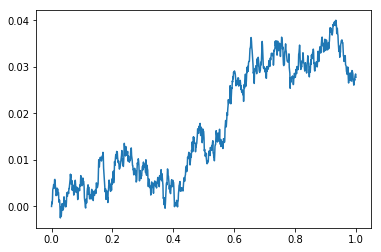

In [41]:
n = 1000
T = 1
dim = 1
rho = 0.5
S0 = 1
H = 0.5
nabla = 0.1
lambdas = 1


W,Z = corr_brownian_motion(n, T, dim, rho)
S,W_H = rough_bergomi(H,nabla,lambdas,T,W,Z,S0)
import matplotlib.pyplot as plt 
plt.plot(np.linspace(0,T,n+1),W_H[0,:])